# Problem 1.1.1

In [73]:
import xml.etree.ElementTree as ET
import numpy as np

# setup
fp = "data/VOCdevkit/VOC2012/Annotations/2007_000027.xml"

def parse_file(fp):    
    # extract xml tree
    tree = ET.parse(fp)
    root = tree.getroot()

    # identify objects
    # extract boundary box data
    output = []
    for obj in root.findall("./object"):
        name = obj.find("name").text
        box = obj.find("bndbox")
        x = int(box.find("xmin").text)
        xmax = int(box.find("xmax").text)
        y = int(box.find("ymin").text)
        ymax = int(box.find("ymax").text)
        
        w = xmax - x
        h = ymax - y
        
        coords = [name, x, y, w, h]
        output.append(coords)

    # put in numpy array format 
    output = np.array(output)
    
    return(output)

# Problem 1.1.2

In [75]:
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image

xml_path = "data/VOCdevkit/VOC2012/Annotations/2007_000027.xml"
img_path = "data/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg"

def show_image(img_path, xml_path):
    # load image
    # load xml file
    img = Image.open(img_path)
    bndbox = parse_file(xml_path)
    
    # make figure
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    # make boxes
    for obj in bndbox:
        box = patches.Rectangle((int(obj[1]), int(obj[2])), int(obj[3]), int(obj[4]), 
                                linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(box)


# Problem 1.3

# Problem 2

In [212]:
from imagecorruptions import corrupt, get_corruption_names
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
from time import time
import random
import torch

# setup
corr_names = get_corruption_names()
folder_path = "data/VOCdevkit/VOC2012/JPEGImages/"

img_paths = [os.path.join(folder_path, img_path) for img_path in os.listdir(folder_path)]
random.shuffle(img_paths)
partition = int(0.8 * len(img_paths))
train_paths = img_paths[:partition]
val_paths = img_paths[partition:]

# generate corrupted datasets
def corrupt_set(img_paths):
    start = time()
    imgs_final = []
    for img_path in img_paths:
        # load image
        # resize image
        img = np.array(Image.open(img_path))
        img = cv2.resize(img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)

        # generate corruptions
        # add to larger dataset
        #for corr_name in corr_names:
        for sev in range(1,6):
            img_noised = corrupt(img, corruption_name="gaussian_noise", severity=sev)
            img_pair = np.stack([img_noised, img], axis=3)
            imgs_final.append(img_pair)
    print(time() - start)
    return(imgs_final)

train_final = corrupt_set(train_paths)
val_final = corrupt_set(val_paths)

# save dataset
np.save("train_imgs.npy", train_final)
np.save("val_imgs.npy", val_final)

1626.6213870048523
447.2577455043793


In [211]:
class ImgData(filepath):
    def __init__(self, data):
        # load dataset
        data = np.load(filepath)
        self.data = torch.stack([torch.from_numpy(img_pair) for img_pair in data], dim=0)
        self.corrupted = self.data[:,:,:,:,0]
        self.orig = self.data[:,:,:,:,1]
        
    def __len__(self):
        return len(self.preds)

    def __getitem__(self, rownum):
        corrupted = self.corrupted[rownum,:,:,:]
        orig = self.orig[rownum,:,:,:]

        return preds, target
    
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        # this implementation can be found in the lecture slides on Autoencoders
        # the encoder/decoder are designed through two convolutional layers each.
        super(ConvAutoEncoder, self).__init__()
        self.Encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1), # for MNIST the size of the output after this layer is 10 X 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2), # 5 X 5
            nn.Conv2d(16, 8, 3, stride=2, padding=1), # 3 X 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1) # 2 X 2
        )
        self.Decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2), # 5 X 5
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1), # 15 X 15
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1), # 28 X 28
            nn.Tanh()
        )

    def forward(self, x):
        x = self.Encoder(x)
        x = self.Decoder(x)
        return x

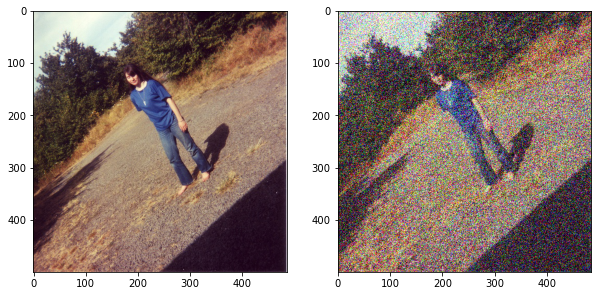

In [222]:
img_path = "data/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg"
img = Image.open(img_path)
corr_name = "gaussian_noise"
sev = 5
img_noised = corrupt(np.array(img), corruption_name=corr_name, severity=sev)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img)
ax[1].imshow(img_noised)

In [226]:
stacked_tensor[:,:,:,:,1].shape

torch.Size([17125, 500, 500, 3])